In [3]:
import json

with open('Sarcasm_Headlines_Dataset.json','r') as f:
    datastore=json.load(f)

In [4]:
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
## Hyperparameter
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 10000

# Maximum length of the padded sequences
max_length = 32

# Output dimensions of the Embedding layer
embedding_dim = 16

In [6]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [8]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [9]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
num_epochs = 30
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5693 - accuracy: 0.6965 - val_loss: 0.4073 - val_accuracy: 0.8338 - 1s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3201 - accuracy: 0.8713 - val_loss: 0.3462 - val_accuracy: 0.8553 - 641ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 0.2392 - accuracy: 0.9060 - val_loss: 0.3484 - val_accuracy: 0.8539 - 614ms/epoch - 982us/step
Epoch 4/30
625/625 - 1s - loss: 0.1937 - accuracy: 0.9250 - val_loss: 0.3587 - val_accuracy: 0.8530 - 564ms/epoch - 902us/step
Epoch 5/30
625/625 - 1s - loss: 0.1607 - accuracy: 0.9409 - val_loss: 0.3857 - val_accuracy: 0.8486 - 556ms/epoch - 890us/step
Epoch 6/30
625/625 - 1s - loss: 0.1367 - accuracy: 0.9517 - val_loss: 0.4108 - val_accuracy: 0.8475 - 574ms/epoch - 919us/step
Epoch 7/30
625/625 - 1s - loss: 0.1162 - accuracy: 0.9607 - val_loss: 0.4520 - val_accuracy: 0.8454 - 598ms/epoch - 957us/step
Epoch 8/30
625/625 - 1s - loss: 0.1012 - accuracy: 0.9668 - val_loss: 0.4930 - val_accuracy: 0.8408 - 592ms/epoch - 94

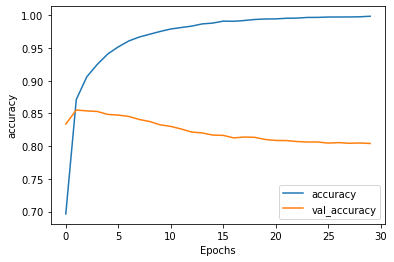

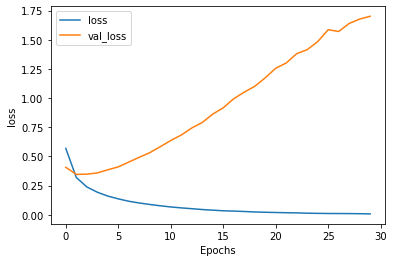

In [12]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 'https://github.com/tensorflow/datasets/tree/master/docs/catalog'